In [1]:
import ccxt
import numpy as np
import pandas as pd
import datetime as dt
from dateutil import tz
import matplotlib.pyplot as plt

import json
import time
import os
import sys

In [2]:
src_path = '../src/'
sys.path.append(os.path.abspath(src_path))
import func_get
import func_signal
import func_backtest

In [3]:
start_ts = time.time()

In [4]:
interval_dict = {
    '1m': 1,
    '5m': 5,
    '15m': 15,
    '30m': 30,
    '1h': 60,
    '2h': 120,
    '4h': 240,
    '1d': 1440
}

In [5]:
with open('../../../_keys/ftx/ftx_read_keys.json') as keys_file:
    keys_dict = json.load(keys_file)
    
exchange = ccxt.ftx({'apiKey': keys_dict['apiKey'],
                     'secret': keys_dict['secret'],
                     'enableRateLimit': True})

### Config

In [6]:
project_name = 'messi_revert'

In [7]:
start_date = dt.datetime(2022, 1, 1)
start_hour = 1
end_date = dt.datetime.today() - dt.timedelta(days=1)
reinvest_profit_flag = True

In [8]:
config_params = {
    'safety_ohlcv_range': 1000,
    'action_timeframe': '2h',
    'target_side': ['buy', 'sell'],
    'base': {
        'symbol': ['ETH-PERP'],
        'open': {
            '2h': {
                'tma': {
                    'check': ['check_signal_side_change'],
                    'look_back': 1,
                    'windows': 50,
                    'revert': True
                }
            }
        },
        'close': {
            '2h': {
                'tma': {
                    'check': ['check_signal_side'],
                    'look_back': 1,
                    'windows': 50,
                    'revert': True
                }
            }
        }
    },
    'lead': {
        'symbol': [],
        'open': {
        },
        'close': {
        }
    },
    'tp': {
        'stop_percent': 100,
        'price_percent': None,
        'signal': None,
    },
    'sl': {
        'stop_percent': 100,
        'price_percent': None,
        'signal': None
    },
    'action_percent': 100,
    'leverage': 1,
    'taker_fee_percent': 0.07
}

### Get data

In [9]:
ohlcv_df_dict = func_get.get_data(exchange, start_date, end_date, start_hour, interval_dict, config_params)

base: timeframe 1/1 symbol 1/1 date 1/286
base: timeframe 1/1 symbol 1/1 date 2/286
base: timeframe 1/1 symbol 1/1 date 3/286
base: timeframe 1/1 symbol 1/1 date 4/286
base: timeframe 1/1 symbol 1/1 date 5/286
base: timeframe 1/1 symbol 1/1 date 6/286
base: timeframe 1/1 symbol 1/1 date 7/286
base: timeframe 1/1 symbol 1/1 date 8/286
base: timeframe 1/1 symbol 1/1 date 9/286
base: timeframe 1/1 symbol 1/1 date 10/286
base: timeframe 1/1 symbol 1/1 date 11/286
base: timeframe 1/1 symbol 1/1 date 12/286
base: timeframe 1/1 symbol 1/1 date 13/286
base: timeframe 1/1 symbol 1/1 date 14/286
base: timeframe 1/1 symbol 1/1 date 15/286
base: timeframe 1/1 symbol 1/1 date 16/286
base: timeframe 1/1 symbol 1/1 date 17/286
base: timeframe 1/1 symbol 1/1 date 18/286
base: timeframe 1/1 symbol 1/1 date 19/286
base: timeframe 1/1 symbol 1/1 date 20/286
base: timeframe 1/1 symbol 1/1 date 21/286
base: timeframe 1/1 symbol 1/1 date 22/286
base: timeframe 1/1 symbol 1/1 date 23/286
base: timeframe 1/1 

base: timeframe 1/1 symbol 1/1 date 190/286
base: timeframe 1/1 symbol 1/1 date 191/286
base: timeframe 1/1 symbol 1/1 date 192/286
base: timeframe 1/1 symbol 1/1 date 193/286
base: timeframe 1/1 symbol 1/1 date 194/286
base: timeframe 1/1 symbol 1/1 date 195/286
base: timeframe 1/1 symbol 1/1 date 196/286
base: timeframe 1/1 symbol 1/1 date 197/286
base: timeframe 1/1 symbol 1/1 date 198/286
base: timeframe 1/1 symbol 1/1 date 199/286
base: timeframe 1/1 symbol 1/1 date 200/286
base: timeframe 1/1 symbol 1/1 date 201/286
base: timeframe 1/1 symbol 1/1 date 202/286
base: timeframe 1/1 symbol 1/1 date 203/286
base: timeframe 1/1 symbol 1/1 date 204/286
base: timeframe 1/1 symbol 1/1 date 205/286
base: timeframe 1/1 symbol 1/1 date 206/286
base: timeframe 1/1 symbol 1/1 date 207/286
base: timeframe 1/1 symbol 1/1 date 208/286
base: timeframe 1/1 symbol 1/1 date 209/286
base: timeframe 1/1 symbol 1/1 date 210/286
base: timeframe 1/1 symbol 1/1 date 211/286
base: timeframe 1/1 symbol 1/1 d

### Add signal

In [10]:
ohlcv_df_dict = func_signal.add_signal(start_date, ohlcv_df_dict, interval_dict, config_params)

base add tma to ETH-PERP 2h


### Back test

In [11]:
action_time_list = func_get.gen_action_time_list(config_params, ohlcv_df_dict)
max_open_timeframe = func_backtest.get_max_open_timeframe(config_params, interval_dict)

In [12]:
budget = 100

transaction_dict = {
    'symbol': [],
    'side': [],
    'amount': [],
    'open_time': [],
    'open_price': [],
    'close_time': [],
    'close_price': [],
    'value': [],
    'notional': [],
    'profit': [],
    'profit_percent': []
}

position_dict = {}

if reinvest_profit_flag == True:
    budget_dict = {
        'time': [],
        'budget': []
    }
    
max_drawdown = 0

In [13]:
if reinvest_profit_flag == True:
    min_budget = budget

time_count = 0

for signal_time in action_time_list:
    action_time = signal_time + dt.timedelta(minutes=interval_dict[config_params['action_timeframe']])
    
    time_count += 1
    print(f"Time {action_time}: progress {time_count}/{len(action_time_list)}")

    '''
    Close positions
    '''
    for symbol in [x for x in position_dict.keys()]:
        print(f"  {symbol}")
        budget, max_drawdown, position_dict, transaction_dict = func_backtest.close_position(symbol, signal_time, max_drawdown, config_params, budget, reinvest_profit_flag, ohlcv_df_dict, position_dict, transaction_dict, interval_dict)

    '''
    Open positions
    '''
    max_position = int(1 / (config_params['action_percent'] / 100))

    for symbol in [x for x in config_params['base']['symbol'] if x not in position_dict.keys()][:max_position]:
        print(f"  {symbol}")
        position_dict = func_backtest.open_position(symbol, signal_time, max_open_timeframe, config_params, budget, ohlcv_df_dict, position_dict, interval_dict)    
    
    '''
    Update budget
    '''
    if reinvest_profit_flag == True:
        budget_dict['time'].append(signal_time)
        budget_dict['budget'].append(budget)

        if budget < min_budget:
            min_budget = budget

    if budget <= 0:
        print(f"Out of money at {action_time}")
        break
        
'''
Clear final position
'''
opened_symbol = list(position_dict.keys())

for symbol in opened_symbol:
    print(f" Clear {symbol} position")
    
    side = position_dict[symbol]['side']
    ohlcv_df = ohlcv_df_dict['base'][config_params['action_timeframe']][symbol]
    current_ohlcv_df = ohlcv_df[ohlcv_df['time'] == signal_time].reset_index(drop=True)
    close_price = current_ohlcv_df.loc[0, 'close']
    close_percent = 100
    
    budget, position_dict, transaction_dict = func_backtest.update_close_position(symbol, side, close_price, close_percent, signal_time, config_params, budget, reinvest_profit_flag, position_dict, transaction_dict, interval_dict)

Time 2022-01-01 03:00:00: progress 1/1428
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 05:00:00: progress 2/1428
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 07:00:00: progress 3/1428
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 09:00:00: progress 4/1428
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 11:00:00: progress 5/1428
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 13:00:00: progress 6/1428
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 15:00:00: progress 7/1428
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 17:00:00: progress 8/1428
  ETH-PERP
     base ETH-PERP check_signal_side_

     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-01-20 03:00:00: progress 229/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-01-20 05:00:00: progress 230/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-01-20 07:00:00: progress 231/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-01-20 09:00:00: progress 232/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-01-20 11:00:00: progress 233/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-01-20 13:00:00: progress 234/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-01-20 15:00:00: progress 235/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-01-20 17:00:00: progress 236/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy

     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-02-07 21:00:00: progress 454/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-02-07 23:00:00: progress 455/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-02-08 01:00:00: progress 456/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-02-08 03:00:00: progress 457/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-02-08 05:00:00: progress 458/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-02-08 07:00:00: progress 459/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-02-08 09:00:00: progress 460/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-02-08 11:00:00: progress 461/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma

     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-14 05:00:00: progress 530/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-14 07:00:00: progress 531/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-14 09:00:00: progress 532/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-14 11:00:00: progress 533/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-14 13:00:00: progress 534/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-14 15:00:00: progress 535/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-14 17:00:00: progress 536/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-14 19:00:00: progress 537/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy

     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-28 07:00:00: progress 699/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-28 09:00:00: progress 700/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-28 11:00:00: progress 701/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-28 13:00:00: progress 702/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-28 15:00:00: progress 703/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-28 17:00:00: progress 704/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-28 19:00:00: progress 705/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-28 21:00:00: progress 706/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy

     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-06 13:00:00: progress 774/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-06 15:00:00: progress 775/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-06 17:00:00: progress 776/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-06 19:00:00: progress 777/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-06 21:00:00: progress 778/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-06 23:00:00: progress 779/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-07 01:00:00: progress 780/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-07 03:00:00: progress 781/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy

     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-20 01:00:00: progress 936/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-20 03:00:00: progress 937/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-20 05:00:00: progress 938/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-20 07:00:00: progress 939/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-20 09:00:00: progress 940/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-20 11:00:00: progress 941/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-20 13:00:00: progress 942/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-20 15:00:00: progress 943/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma

     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-26 21:00:00: progress 1018/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-26 23:00:00: progress 1019/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-27 01:00:00: progress 1020/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-27 03:00:00: progress 1021/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-27 05:00:00: progress 1022/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-27 07:00:00: progress 1023/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-27 09:00:00: progress 1024/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-27 11:00:00: progress 1025/1428
  ETH-PERP
     base ETH-PERP check_signal_

     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-09 09:00:00: progress 1180/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-09 11:00:00: progress 1181/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-09 13:00:00: progress 1182/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-09 15:00:00: progress 1183/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-09 17:00:00: progress 1184/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-09 19:00:00: progress 1185/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-09 21:00:00: progress 1186/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-09 23:00:00: progress 1187/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma

     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-15 15:00:00: progress 1255/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-15 17:00:00: progress 1256/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-15 19:00:00: progress 1257/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-15 21:00:00: progress 1258/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-15 23:00:00: progress 1259/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-16 01:00:00: progress 1260/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-16 03:00:00: progress 1261/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-16 05:00:00: progress 1262/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma

  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-28 17:00:00: progress 1412/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Closed by signal at 2941.3
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: sell
     sell: 0.021071799826174294
     price: 2941.3
     tp: 0
     sl: inf
Time 2022-04-28 19:00:00: progress 1413/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-04-28 21:00:00: progress 1414/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Closed by signal at 2870.2
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: buy
     buy: 0.02208590643895359
     price: 2870.2
     tp: inf
     sl: 0
Time 2022-04-28 23:00:00: progress 1415/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-29 01:00:00: progress 1416/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Closed by signa

In [14]:
end_ts = time.time()
time_process = end_ts - start_ts
print(f"Time process: {round(time_process / 60, 2)} minutes")

Time process: 0.97 minutes


### Result

In [15]:
transaction_df = pd.DataFrame(transaction_dict)
transaction_df.to_csv(f'transactions/{project_name}.csv', index=False)
transaction_df

,symbol,side,amount,open_time,open_price,close_time,close_price,value,notional,profit,profit_percent
0,ETH-PERP,sell,0.026592,2022-01-02 01:00:00,3760.6,2022-01-04 03:00:00,3738.5,100.000000,100.000000,0.448084,0.448397
1,ETH-PERP,buy,0.026869,2022-01-04 03:00:00,3738.5,2022-01-04 07:00:00,3765.0,100.448084,100.448084,0.570891,0.567947
2,ETH-PERP,sell,0.026831,2022-01-04 07:00:00,3765.0,2022-01-04 09:00:00,3732.2,101.018974,101.018974,0.739249,0.732304
3,ETH-PERP,buy,0.027265,2022-01-04 09:00:00,3732.2,2022-01-04 15:00:00,3763.8,101.758223,101.758223,0.718508,0.705599
4,ETH-PERP,sell,0.027227,2022-01-04 15:00:00,3763.8,2022-01-06 01:00:00,3773.1,102.476731,102.476731,-0.396855,-0.387535
...,...,...,...,...,...,...,...,...,...,...,...
67,ETH-PERP,buy,0.021101,2022-04-26 23:00:00,2859.8,2022-04-28 17:00:00,2941.3,60.344445,60.344445,1.634040,2.705961
68,ETH-PERP,sell,0.021072,2022-04-28 17:00:00,2941.3,2022-04-28 21:00:00,2870.2,61.978485,61.978485,1.412484,2.280587
69,ETH-PERP,buy,0.022086,2022-04-28 21:00:00,2870.2,2022-04-29 01:00:00,2972.1,63.390969,63.390969,2.160231,3.405406
70,ETH-PERP,sell,0.022056,2022-04-29 01:00:00,2972.1,2022-04-29 17:00:00,2879.8,65.551200,65.551200,1.945377,2.969801


In [16]:
if reinvest_profit_flag == True:
    print(f"Final budget: {round(budget, 2)}")
else:
    print("Not reinvest profit")

Final budget: 66.06


In [17]:
if reinvest_profit_flag == True:
    return_percent = (budget_dict['budget'][-1] - budget_dict['budget'][0]) / budget_dict['budget'][0] * 100
    print(f"Return: {round(return_percent, 2)}%")
else:
    print("Not reinvest profit")

Return: -32.5%


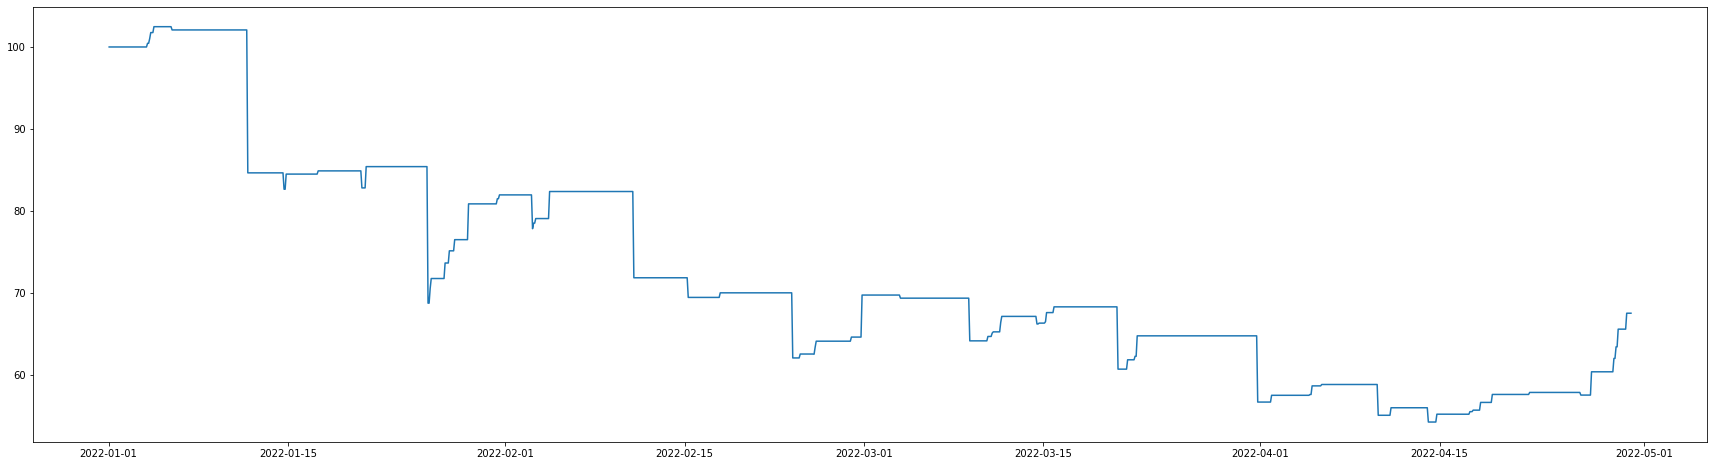

In [18]:
if reinvest_profit_flag == True:
    fig, ax = plt.subplots(figsize=(30, 8))
    ax.plot(budget_dict['time'], budget_dict['budget'])
else:
    print("Not reinvest profit")

In [19]:
if reinvest_profit_flag == True:
    print(f"Max drawdown: {round(max_drawdown * 100, 2)}%")

Max drawdown: 29.89%


In [20]:
win_rate = len(transaction_df[transaction_df['profit'] > 0]) / len(transaction_df)
print(f"Win rate: {round(win_rate * 100, 2)}%")

Win rate: 72.22%


In [21]:
for symbol in transaction_df['symbol'].unique():
    symbol_df = transaction_df[transaction_df['symbol'] == symbol]
    win_rate = len(symbol_df[symbol_df['profit'] > 0]) / len(symbol_df)
    print(f"{symbol} win rate: {round(win_rate * 100, 2)}%")

ETH-PERP win rate: 72.22%


In [22]:
print(f"Distribution")
print(pd.DataFrame(transaction_df['profit_percent'].describe()))

Distribution
       profit_percent
count       72.000000
mean        -0.449254
std          4.833898
min        -19.506159
25%         -0.122198
50%          0.723813
75%          1.760902
max          7.940398


In [23]:
for symbol in transaction_df['symbol'].unique():
    temp_return = transaction_df[transaction_df['symbol'] == symbol]['profit_percent']
    
    print(f"Distribution {symbol}:")
    print(pd.DataFrame(temp_return.describe()))
    print("\n")

Distribution ETH-PERP:
       profit_percent
count       72.000000
mean        -0.449254
std          4.833898
min        -19.506159
25%         -0.122198
50%          0.723813
75%          1.760902
max          7.940398




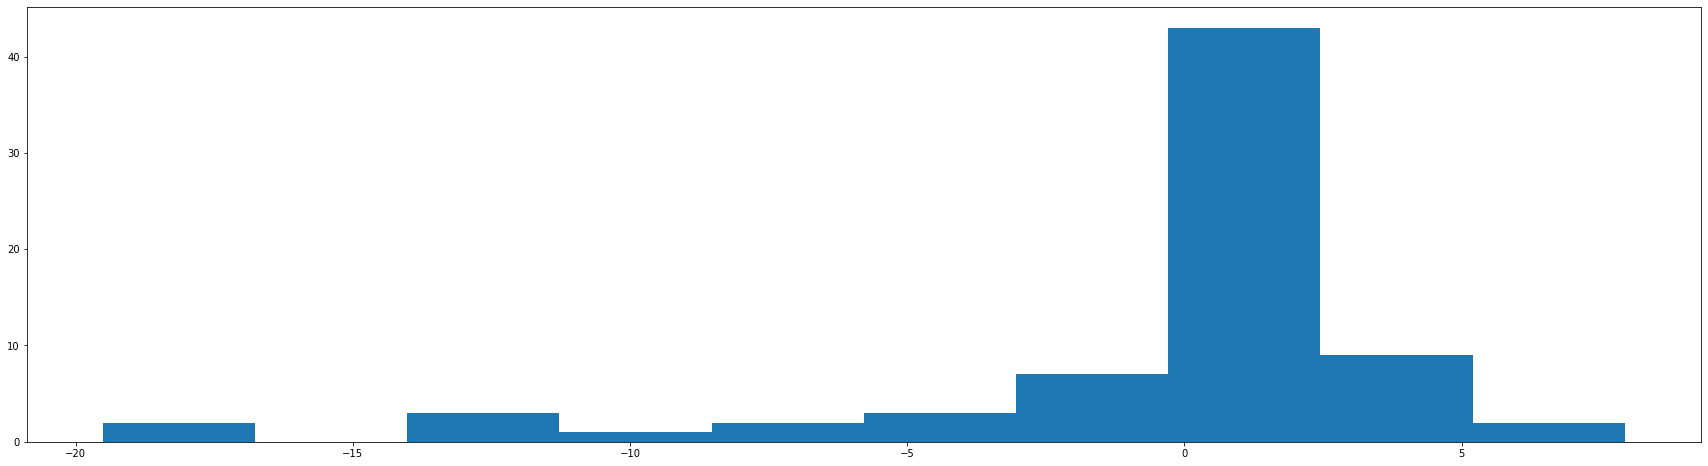

In [24]:
fig, ax = plt.subplots(figsize=(30, 8))
_ = ax.hist(transaction_df['profit_percent'], bins=10)